In [22]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return max(0, x)

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs, actfunc=sigmoid):
        total = np.dot(self.weights, inputs) + self.bias
        return actfunc(total)

class NeuronNetwork1:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward(self, x, actfunc=sigmoid):
        out_h1 = self.h1.feedforward(x, actfunc)
        out_h2 = self.h2.feedforward(x, actfunc)
        out_h3 = self.h3.feedforward(x, actfunc)
        out_o1 = self.o1.feedforward(np.array([out_h1,out_h2,out_h3]), actfunc)
        return out_o1

class NeuronNetwork2:
    def __init__(self):
        weights = np.array([1., 0.])
        bias = 1
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)
    def feedforward(self, x, actfunc=sigmoid):
        out_h1 = self.h1.feedforward(x, actfunc)
        out_h2 = self.h2.feedforward(x, actfunc)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]), actfunc)
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]), actfunc)
        return out_o1, out_o2

n1 = NeuronNetwork1()
x1 = np.array([3., 4., 5.])
print(n1.feedforward(x1))
print(n1.feedforward(x1, tanh))
print(n1.feedforward(x1, relu))
print()
n2 = NeuronNetwork2()
x2 = np.array([1., 2.])
print(n2.feedforward(x2))
print(n2.feedforward(x2, tanh))
print(n2.feedforward(x2, relu))

0.8170206500405062
0.9051449227098689
9.0

(0.8677026536525567, 0.8677026536525567)
(0.9613959740515259, 0.9613959740515259)
(3.0, 3.0)


iris database sizes: (150, 4) (150,)
salary database sizes: (30, 1) (30,)
train/test sizes: (120, 4) (30, 4) (120,) (30,)
train/test sizes: (24, 1) (6, 1) (24,) (6,)
test accuracy: 0.9333333333333333
training accuracy: 0.9916666666666667
loss: 0.06066643022565146
number of coefs: 2
number of intercepts: 2
number of iters for which estimator ran: 592
number of output layer activation function: softmax

test accuracy: 0.9545426691462476
training accuracy: 0.9569127756597507
loss: 15480184.609129524
number of coefs: 2
number of iters for which estimator ran: 99511
number of output layer activation function: identity


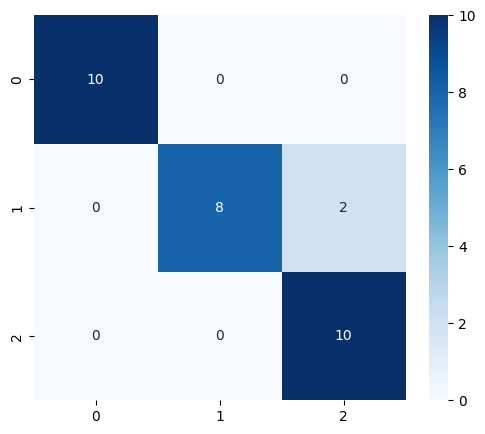

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    fig = plt.figure(figsize=(6,5))
    sn.heatmap(conf_mat, annot=True, cmap="Blues")

url_class = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
url_reg = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"

dfclass = pd.read_csv(url_class)
X_iris, Y_iris = dfclass.iloc[:, :-1], dfclass.iloc[:, -1]
print(f"iris database sizes: {X_iris.shape} {Y_iris.shape}")
dfreg = pd.read_csv(url_reg)
X_salary, Y_salary = dfreg.iloc[:, :-1], dfreg.iloc[:, -1]
print(f"salary database sizes: {X_salary.shape} {Y_salary.shape}")

X_iris_train, X_iris_test, Y_iris_train, Y_iris_test = train_test_split(X_iris, Y_iris, train_size=0.8, test_size=0.2, stratify=Y_iris, random_state=4)
print(f"train/test sizes: {X_iris_train.shape} {X_iris_test.shape} {Y_iris_train.shape} {Y_iris_test.shape}")
X_salary_train, X_salary_test, Y_salary_train, Y_salary_test = train_test_split(X_salary, Y_salary, train_size=0.8, random_state=4)
print(f"train/test sizes: {X_salary_train.shape} {X_salary_test.shape} {Y_salary_train.shape} {Y_salary_test.shape}")

mlp_classifier = MLPClassifier(max_iter=600, random_state=4)
mlp_classifier.fit(X_iris_train, Y_iris_train)
Y_iris_preds = mlp_classifier.predict(X_iris_test)
print(f"test accuracy: {mlp_classifier.score(X_iris_test, Y_iris_test)}")
print(f"training accuracy: {mlp_classifier.score(X_iris_train, Y_iris_train)}")
plot_confusion_matrix(Y_iris_test, Y_iris_preds)
print(f"loss: {mlp_classifier.loss_}")
print(f"number of coefs: {len(mlp_classifier.coefs_)}")
print(f"number of intercepts: {len(mlp_classifier.intercepts_)}")
print(f"number of iters for which estimator ran: {mlp_classifier.n_iter_}")
print(f"number of output layer activation function: {mlp_classifier.out_activation_}")

print()

mlp_regressor = MLPRegressor(max_iter=100000, random_state=4)
mlp_regressor.fit(X_salary_train, Y_salary_train)
Y_salary_preds = mlp_regressor.predict(X_salary_test)
print(f"test accuracy: {mlp_regressor.score(X_salary_test, Y_salary_test)}")
print(f"training accuracy: {mlp_regressor.score(X_salary_train, Y_salary_train)}")
print(f"loss: {mlp_regressor.loss_}")
print(f"number of coefs: {len(mlp_regressor.coefs_)}")
print(f"number of iters for which estimator ran: {mlp_regressor.n_iter_}")
print(f"number of output layer activation function: {mlp_regressor.out_activation_}")